In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
data = pd.read_csv('./assets/datasets/h02.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

   1991-07  0.429795
0  1991-08  0.400906
1  1991-09  0.432159
2  1991-10  0.492543
3  1991-11  0.502369
4  1991-12  0.602652

 Data Types:
1991-07      object
0.429795    float64
dtype: object


In [28]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./assets/datasets/h02.csv', parse_dates=True, index_col='1991-07', date_parser=dateparse)
data.columns = ['Values']
data.index.name = 'Month'
data.head()

,Values
Month,
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543
1991-11-01,0.502369
1991-12-01,0.602652


In [29]:
data.index

DatetimeIndex(['1991-08-01', '1991-09-01', '1991-10-01', '1991-11-01',
               '1991-12-01', '1992-01-01', '1992-02-01', '1992-03-01',
               '1992-04-01', '1992-05-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name=u'Month', length=203, freq=None)

In [33]:
ts = data['Values'] 
ts.head(10)

#1. Specifie the index as a string constant:
ts['1991-08-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1991,8,1)]

0.40090599999999998

In [34]:
#1. Specify the entire range:
print ts['1991-08-01':'1991-12-01']
print 

#2. Use ':' if one of the indices is at ends:
print ts[:'1991-12-01']

Month
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
1991-12-01    0.602652
Name: Values, dtype: float64

Month
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
1991-12-01    0.602652
Name: Values, dtype: float64


In [35]:
ts['1991']

Month
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
1991-12-01    0.602652
Name: Values, dtype: float64

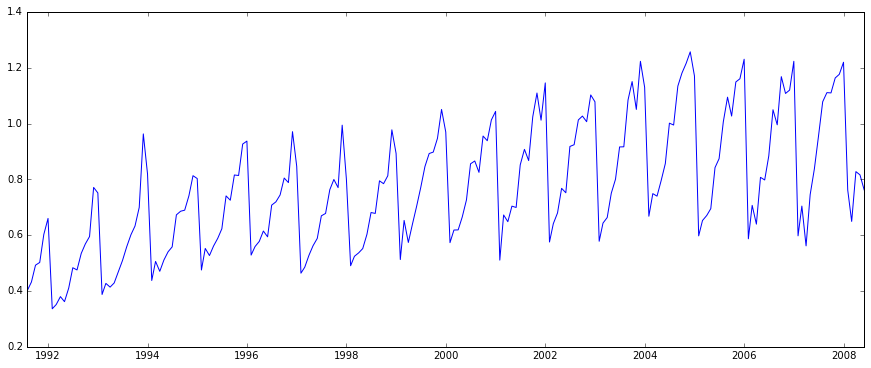

In [36]:
plt.plot(ts)

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


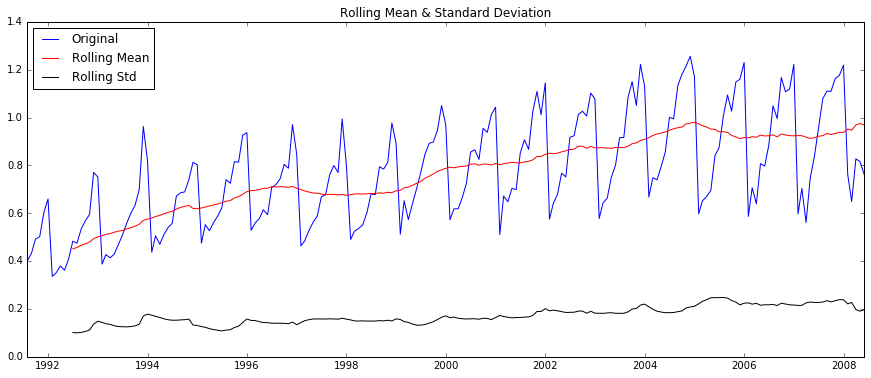

Results of Dickey-Fuller Test:
Test Statistic                  -1.653022
p-value                          0.455465
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (5%)             -2.877123
Critical Value (1%)             -3.465812
Critical Value (10%)            -2.575077
dtype: float64


In [38]:
test_stationarity(ts)

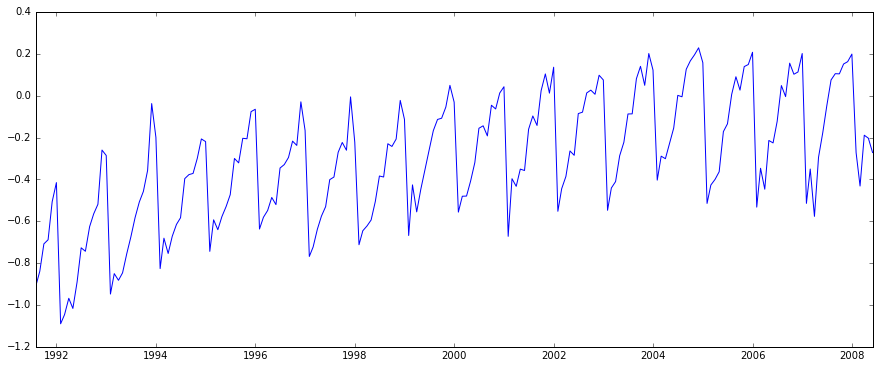

In [40]:
# Create log of ts and plot it
ts_log = np.log(ts)
plt.plot(ts_log)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


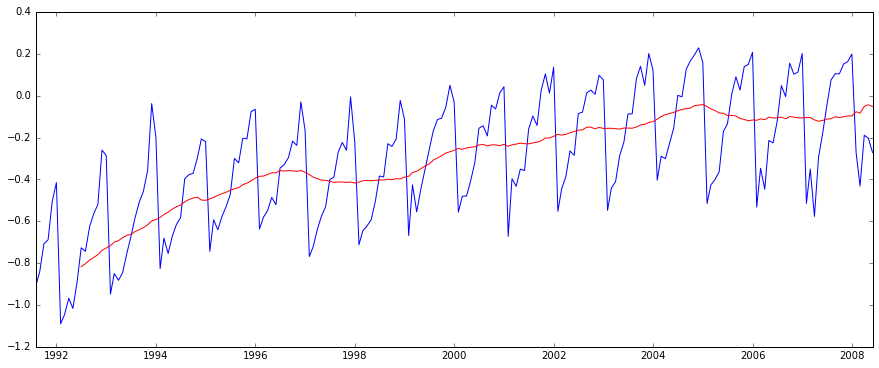

In [42]:
# Plot the same thing as above but with rolling mean
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


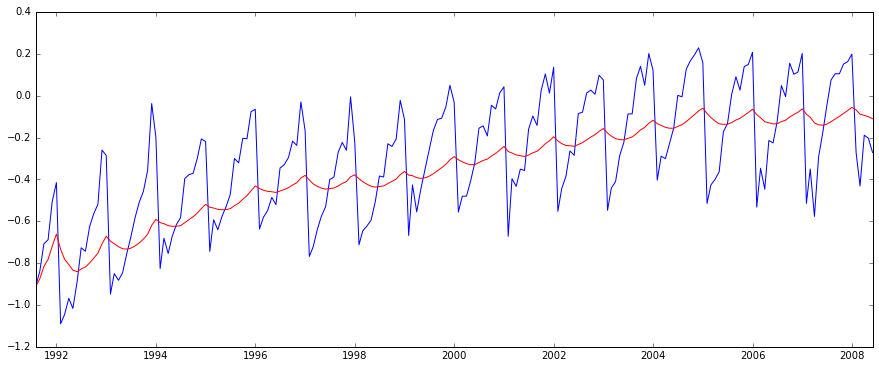

In [43]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


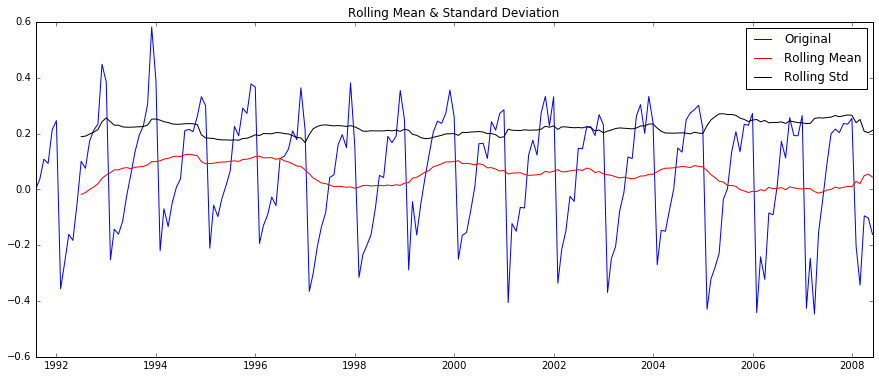

Results of Dickey-Fuller Test:
Test Statistic                  -3.053401
p-value                          0.030199
#Lags Used                      14.000000
Number of Observations Used    188.000000
Critical Value (5%)             -2.877040
Critical Value (1%)             -3.465620
Critical Value (10%)            -2.575032
dtype: float64


In [44]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

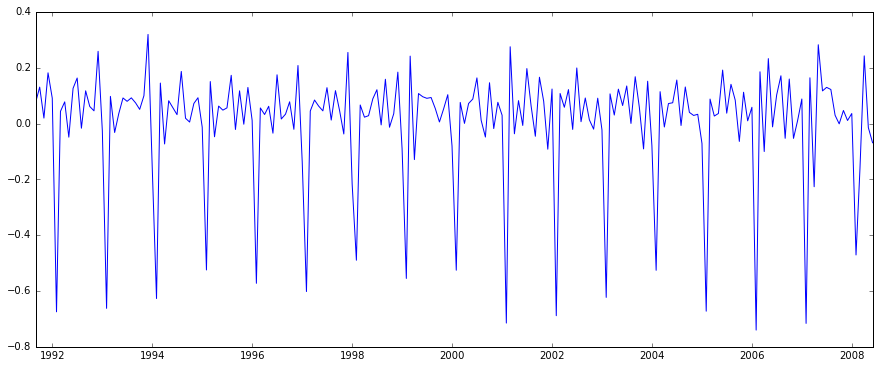

In [45]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


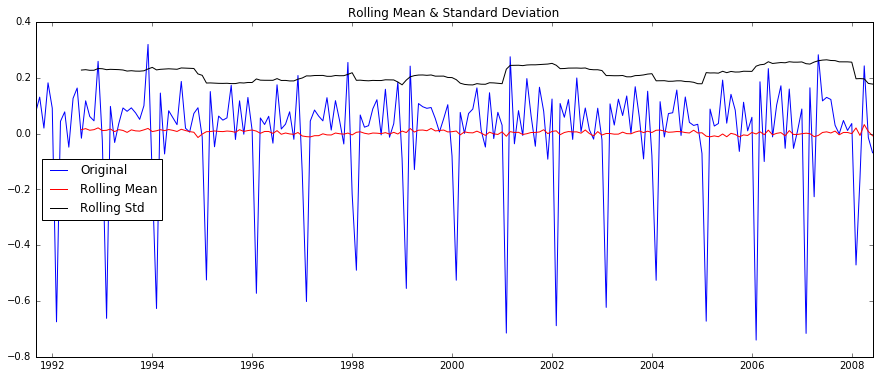

Results of Dickey-Fuller Test:
Test Statistic                  -3.274251
p-value                          0.016069
#Lags Used                      15.000000
Number of Observations Used    186.000000
Critical Value (5%)             -2.877208
Critical Value (1%)             -3.466005
Critical Value (10%)            -2.575122
dtype: float64


In [46]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

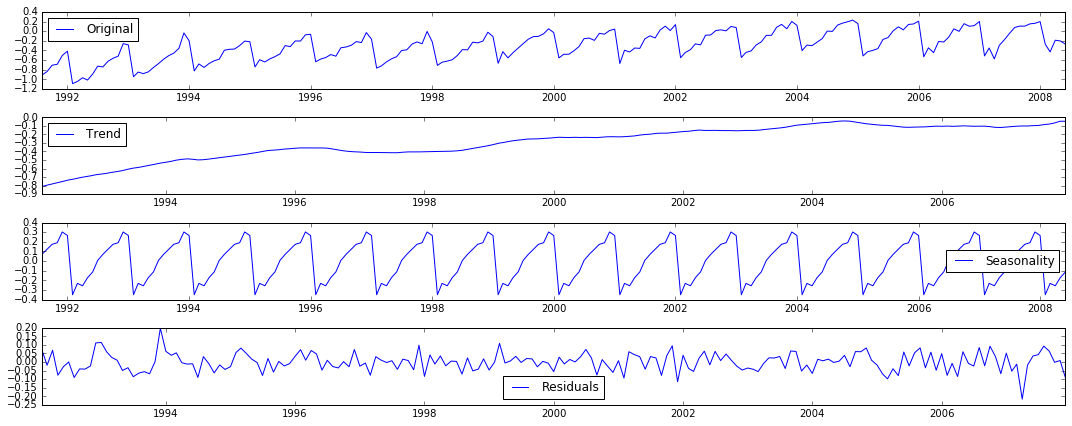

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


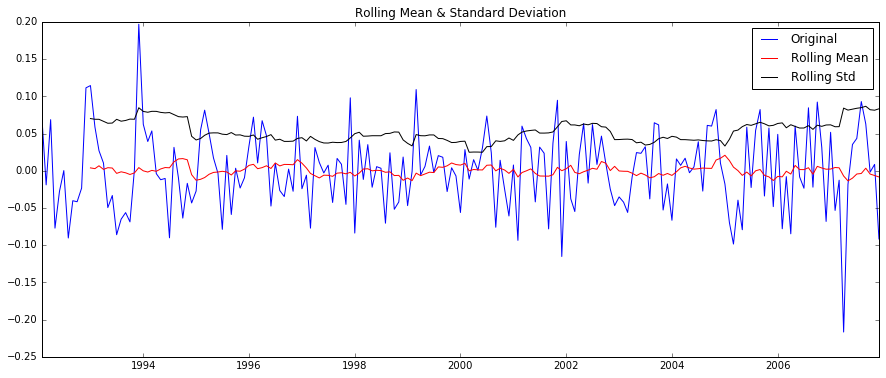

Results of Dickey-Fuller Test:
Test Statistic                -6.124142e+00
p-value                        8.711042e-08
#Lags Used                     1.100000e+01
Number of Observations Used    1.790000e+02
Critical Value (5%)           -2.877826e+00
Critical Value (1%)           -3.467420e+00
Critical Value (10%)          -2.575452e+00
dtype: float64


In [196]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

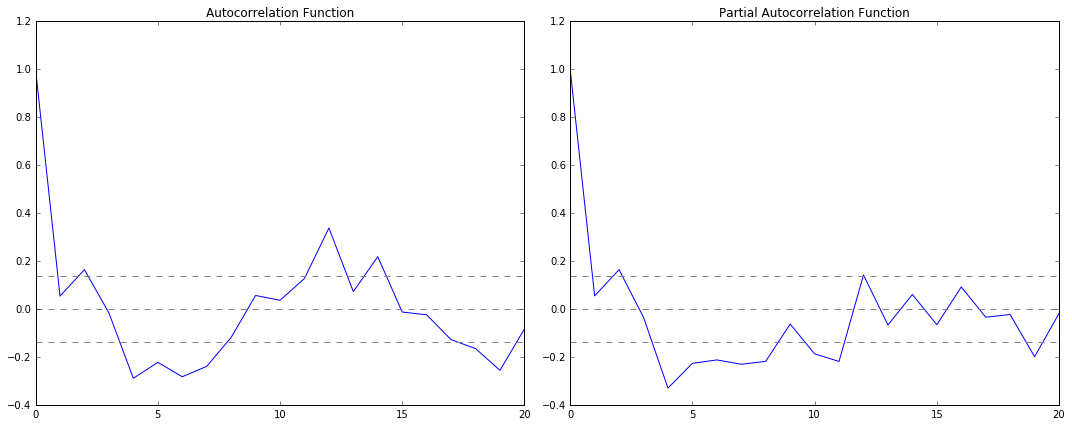

In [197]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(residual, nlags=20)
lag_pacf = pacf(residual, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

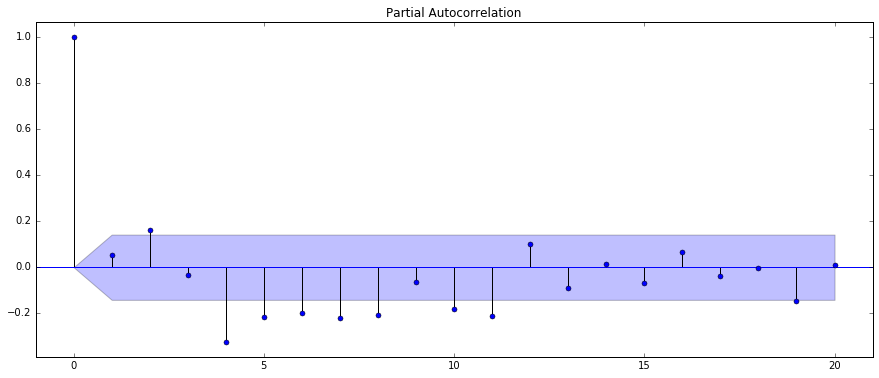

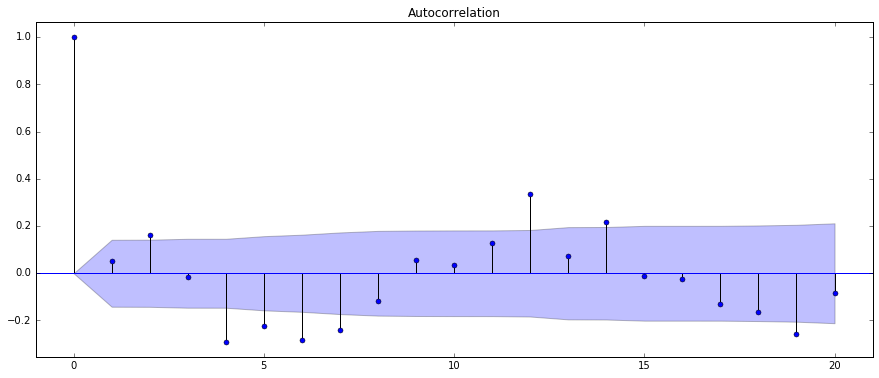

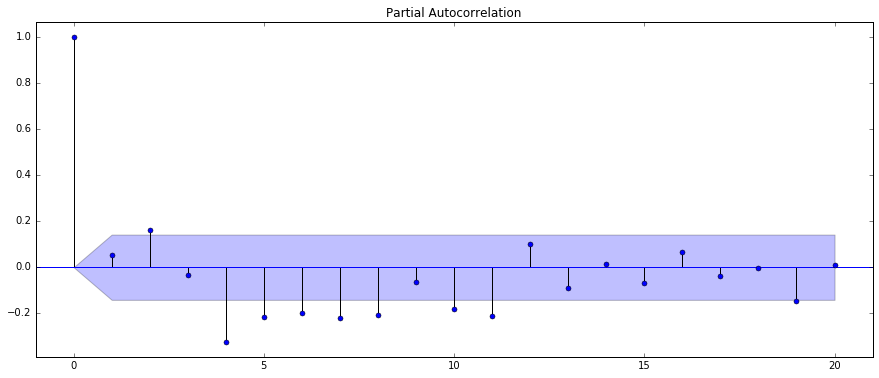

In [198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residual, lags=20)
plot_pacf(residual, lags=20)

In [56]:
from statsmodels.tsa.arima_model import ARIMA

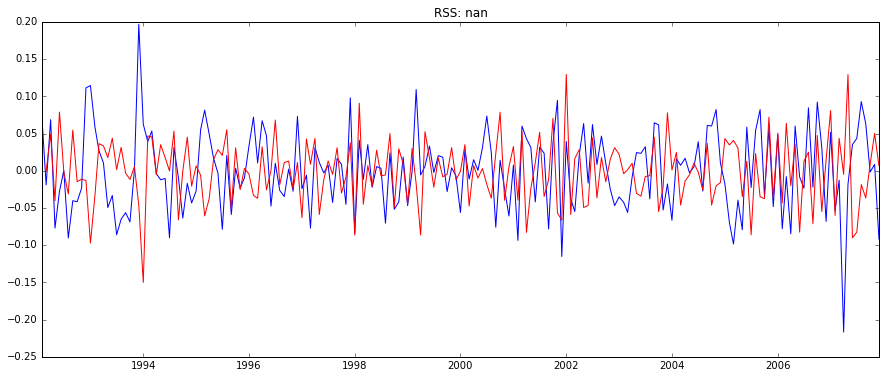

In [57]:
model = ARIMA(residual, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(residual)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


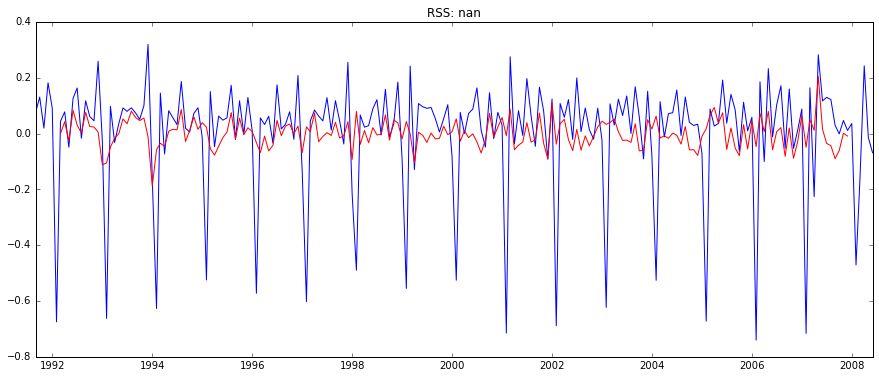

In [169]:
model = ARIMA(residual, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

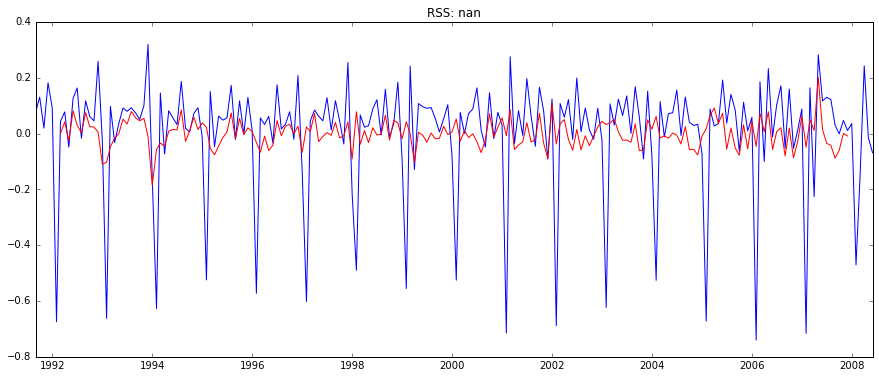

In [227]:
model = ARIMA(residual, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [233]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1992-03-01   -0.000012
1992-04-01    0.042162
1992-05-01   -0.025652
1992-06-01    0.082220
1992-07-01    0.029415
dtype: float64


In [234]:
predictions_ARIMA_diff_wtrend = predictions_ARIMA_diff + trend
print predictions_ARIMA_diff_wtrend.head()

Month
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
1991-12-01   NaN
dtype: float64


In [244]:
predictions_ARIMA_diff_wseason = predictions_ARIMA_diff_wtrend + seasonal
print predictions_ARIMA_diff_wseason.head()

Month
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
1991-12-01   NaN
dtype: float64


In [245]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_wseason,fill_value=0)
predictions_ARIMA_log.head()

Month
1991-08-01   -0.914028
1991-09-01   -0.914028
1991-10-01   -0.914028
1991-11-01   -0.914028
1991-12-01   -0.914028
dtype: float64

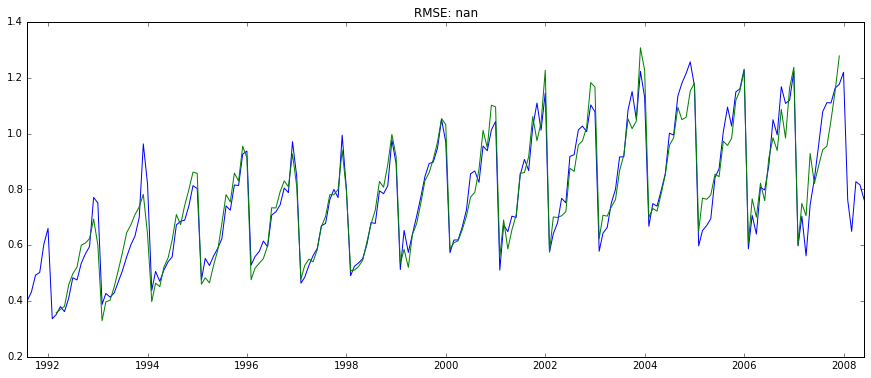

In [246]:
predictions_ARIMA = np.exp(predictions_ARIMA_diff_wseason)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))